# Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set_color_codes()
pd.pandas.set_option('display.max_columns', None)

# Loading dataset

In [3]:
dataset = pd.read_csv('fetal_health.csv')
dataset

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,7.2,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,7.1,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,6.1,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,7.0,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


# Understanding the data

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [5]:
dataset.nunique()

baseline value                                             48
accelerations                                              20
fetal_movement                                            102
uterine_contractions                                       16
light_decelerations                                        16
severe_decelerations                                        2
prolongued_decelerations                                    6
abnormal_short_term_variability                            75
mean_value_of_short_term_variability                       57
percentage_of_time_with_abnormal_long_term_variability     87
mean_value_of_long_term_variability                       249
histogram_width                                           154
histogram_min                                             109
histogram_max                                              86
histogram_number_of_peaks                                  18
histogram_number_of_zeroes                                  9
histogra

In [6]:
print(dataset.severe_decelerations.unique())
print(dataset.prolongued_decelerations.unique())
print(dataset.histogram_tendency.unique())
print(dataset.fetal_health.unique())

[0.    0.001]
[0.    0.002 0.003 0.001 0.004 0.005]
[ 1.  0. -1.]
[2. 1. 3.]


# Duplicates

In [7]:
duplicate = dataset[dataset.duplicated(keep = False)]
print(duplicate.shape)

(24, 22)


In [8]:
dataset = dataset.drop_duplicates(keep='first')
print(dataset.shape)

(2113, 22)


# Visualizing the data

## Count plot of the classes of dependent variable

Text(0.5, 1.0, 'Count plot of Fetal Heath')

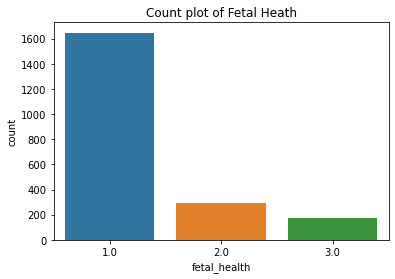

In [9]:
sns.countplot(x = 'fetal_health', data = dataset)
plt.title('Count plot of Fetal Heath', fontsize = 12)

## Box plot

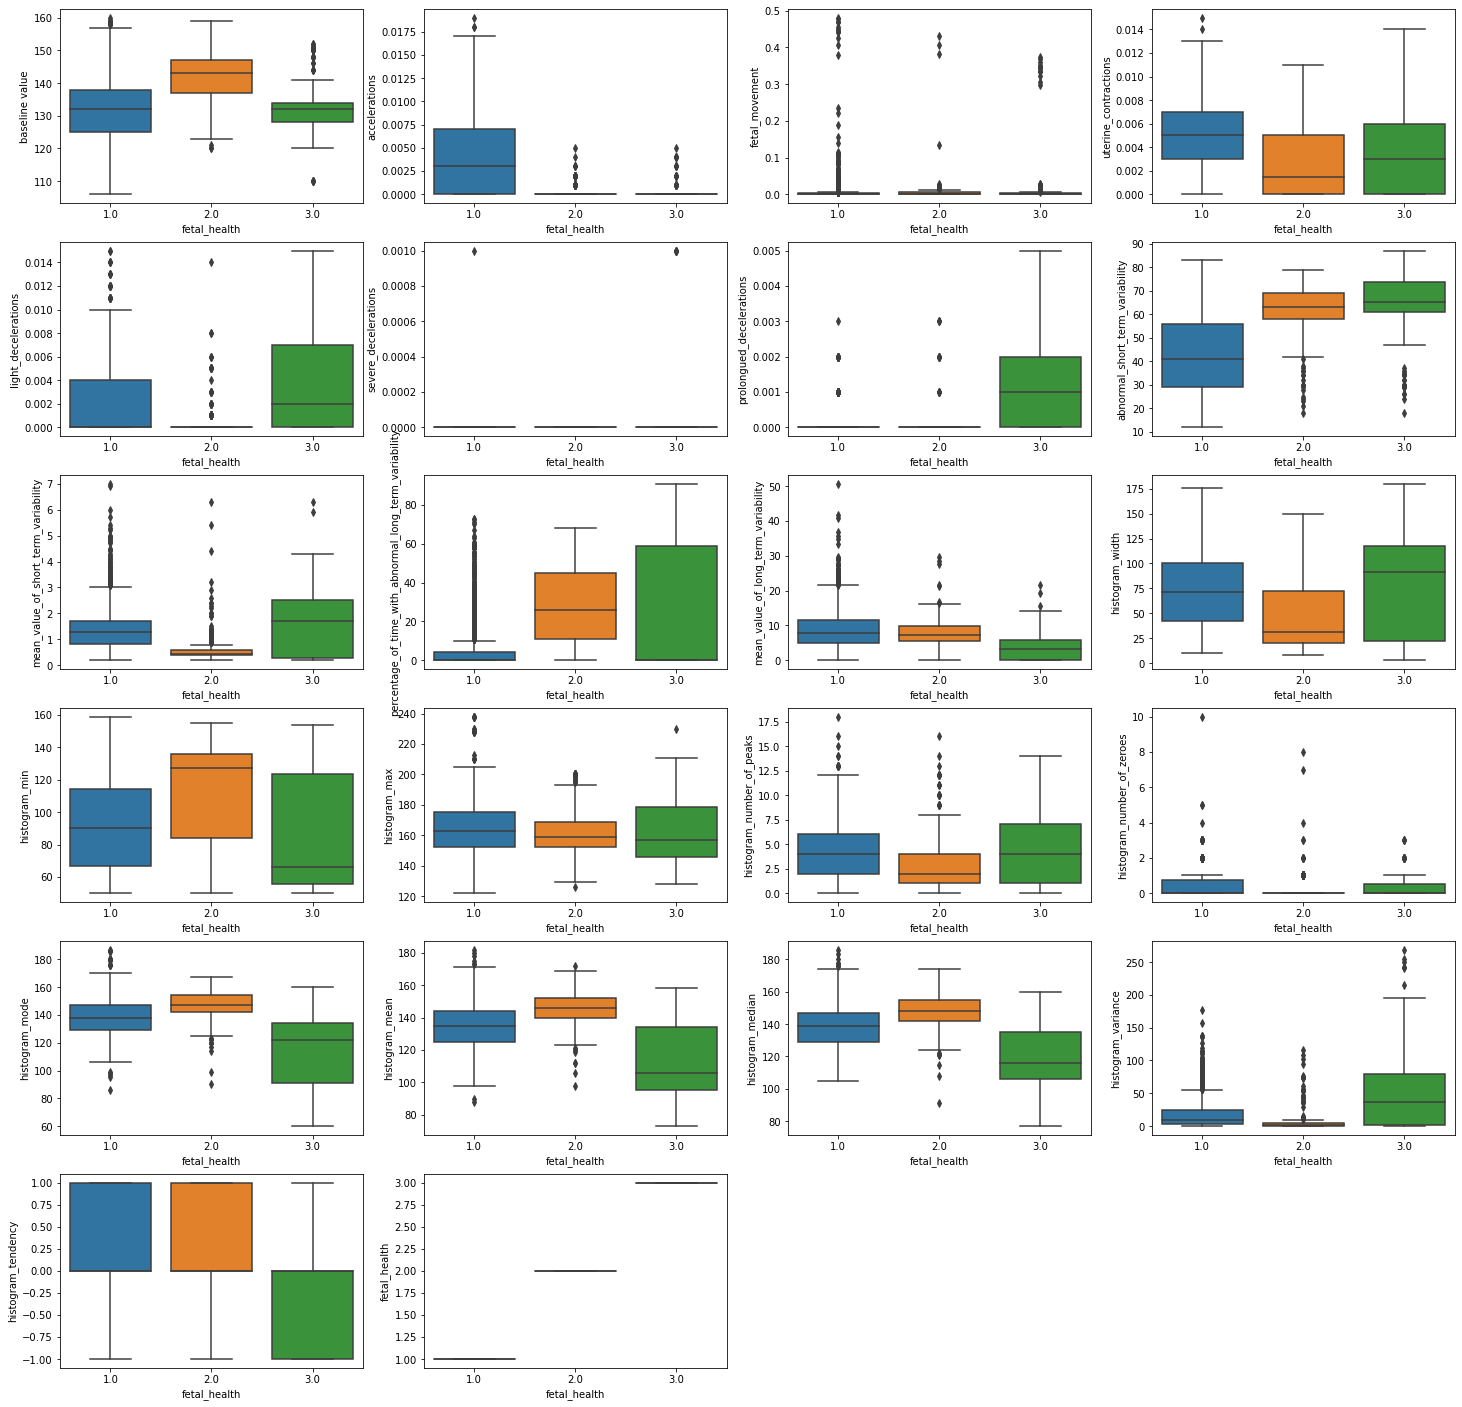

In [10]:
plt.figure(figsize=(25,25))
i=1
for col in dataset.columns:
    plt.subplot(6,4,i)
    sns.boxplot(x = 'fetal_health', y = col, data = dataset)
    i+=1

## Distribution plot

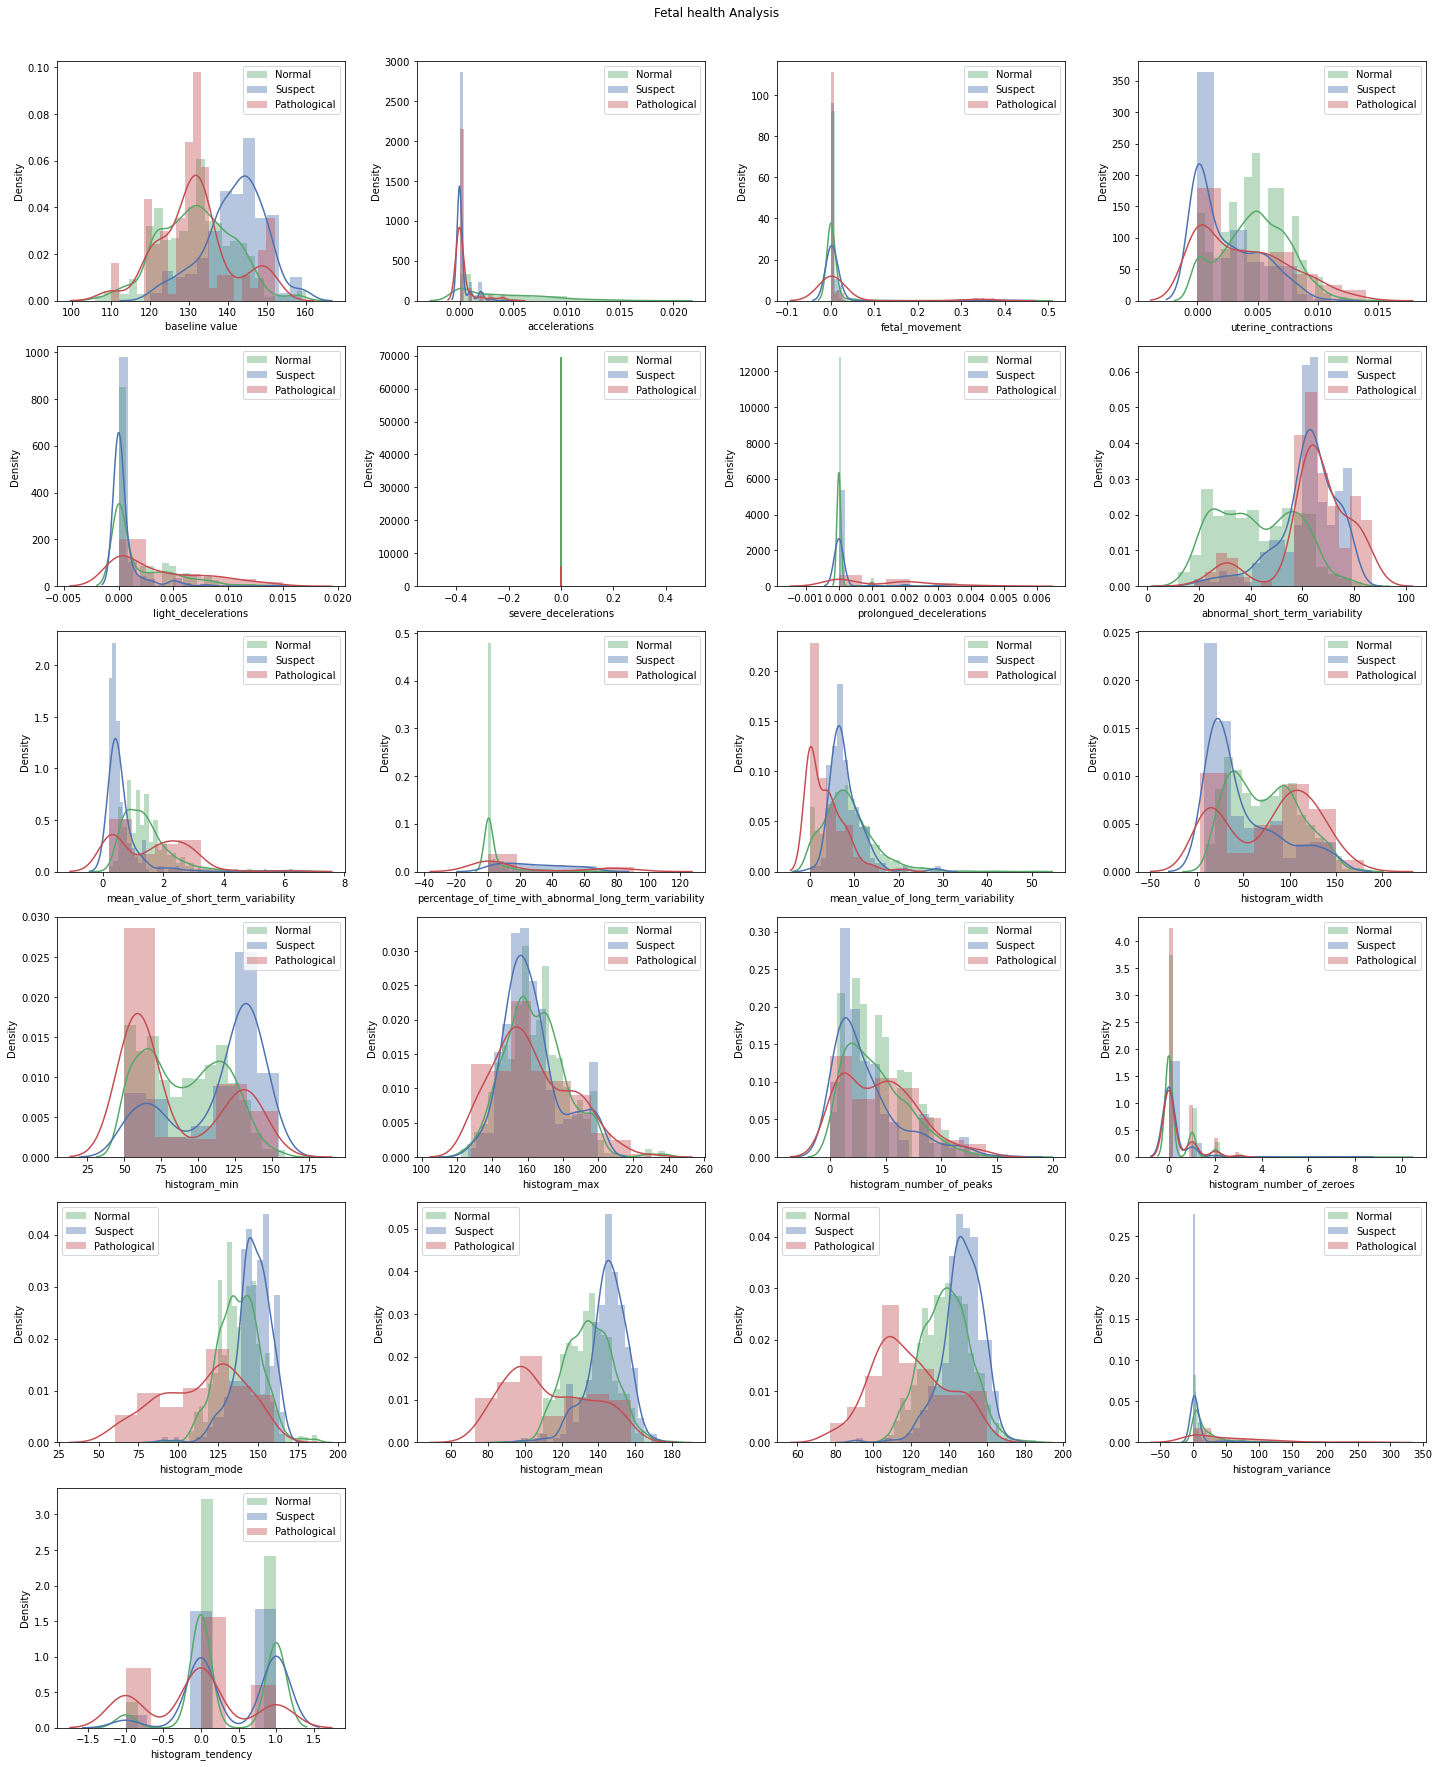

In [11]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in dataset.columns[:-1]:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(dataset[i][dataset['fetal_health']==1.0], color='g', label = 'Normal')
    sns.distplot(dataset[i][dataset['fetal_health']==2.0], color='b', label = 'Suspect')
    sns.distplot(dataset[i][dataset['fetal_health']==3.0], color='r', label = 'Pathological')
    plt.legend(loc='best')
fig.suptitle('Fetal health Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

## Correlation Heatmap

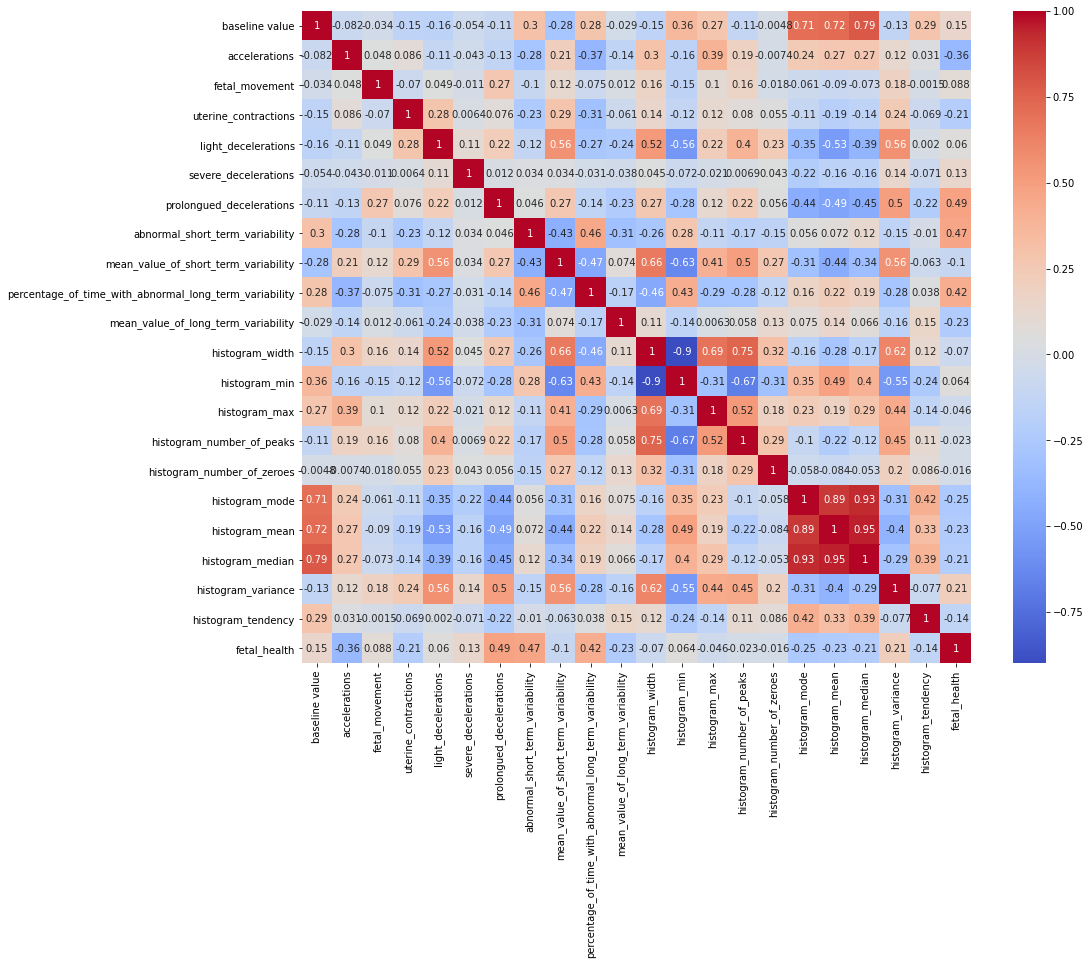

In [12]:
corr = dataset.corr()

plt.figure(figsize = (15,12))
sns.heatmap(corr, annot = True, cmap = "coolwarm")
plt.show()

# Preprocessing

## Removing the features with high correlation by keeping one

In [13]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if abs(corr.iloc[i,j]) >= 0.85:
            if columns[j]:
                columns[j] = False
selected_columns = dataset.columns[columns]
df1 = dataset[selected_columns]

In [14]:
print(df1.shape)
print(selected_columns)

(2113, 19)
Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_variance',
       'histogram_tendency', 'fetal_health'],
      dtype='object')


## Train test split

In [15]:
from sklearn.model_selection import train_test_split

X = df1.drop('fetal_health', axis=1)
y = df1['fetal_health']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

## Feature selection by logistic regression and L2 regularization

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

sel_ = SelectFromModel(LogisticRegression(C=0.1, penalty='l2',class_weight='balanced', solver='lbfgs', random_state=42))
sel_.fit(StandardScaler().fit(X_train.fillna(0)).transform(X_train.fillna(0)), y_train)

SelectFromModel(estimator=LogisticRegression(C=0.1, class_weight='balanced',
                                             random_state=42))

In [17]:
X_train = X_train[X_train.columns[sel_.get_support()]]
X_test = X_test[X_train.columns]

In [18]:
X_train.columns

Index(['accelerations', 'prolongued_decelerations',
       'abnormal_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'histogram_number_of_peaks', 'histogram_mode', 'histogram_variance'],
      dtype='object')

# Building Classifier

In [19]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0, class_weight='balanced', criterion='gini', max_depth=8)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=8, random_state=0)

# Model Evaluation

In [20]:
from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report, matthews_corrcoef

Accuracy score: 0.9457070707070707
Classification report:
               precision    recall  f1-score   support

         1.0       0.99      0.94      0.97      1234
         2.0       0.75      0.95      0.83       219
         3.0       0.96      0.99      0.97       131

    accuracy                           0.95      1584
   macro avg       0.90      0.96      0.92      1584
weighted avg       0.95      0.95      0.95      1584

Matthew Correlation Coefficient Score: 0.8666674988550034


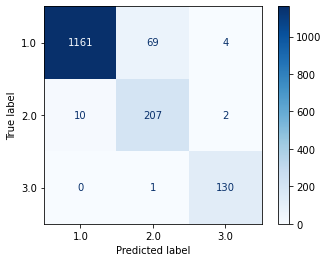

In [21]:
y_pred_train=clf.predict(X_train)

print("Accuracy score: {}".format(accuracy_score(y_train,y_pred_train)))
print("Classification report:\n {}".format(classification_report(y_train,y_pred_train)))
print("Matthew Correlation Coefficient Score: {}".format(matthews_corrcoef(y_train,y_pred_train)))
plot_confusion_matrix(clf, X_train, y_train, cmap='Blues')  

Accuracy score: 0.9054820415879017
Classification report:
               precision    recall  f1-score   support

         1.0       0.96      0.93      0.94       412
         2.0       0.69      0.84      0.76        73
         3.0       0.83      0.80      0.81        44

    accuracy                           0.91       529
   macro avg       0.83      0.85      0.84       529
weighted avg       0.91      0.91      0.91       529

Matthew Correlation Coefficient Score: 0.7551906870423621


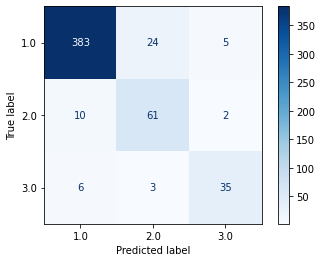

In [22]:
y_pred_test=clf.predict(X_test) 

print("Accuracy score: {}".format(accuracy_score(y_test,y_pred_test)))
print("Classification report:\n {}".format(classification_report(y_test,y_pred_test)))
print("Matthew Correlation Coefficient Score: {}".format(matthews_corrcoef(y_test,y_pred_test)))
plot_confusion_matrix(clf, X_test, y_test, cmap='Blues')  

## Feature Importance

<BarContainer object of 7 artists>

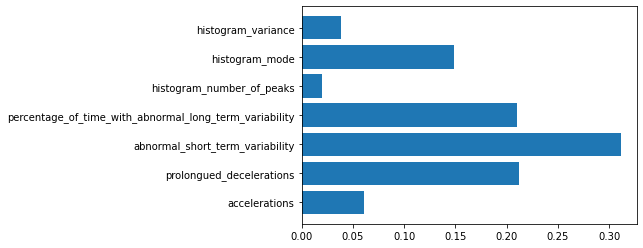

In [23]:
importance = clf.feature_importances_
imp = pd.DataFrame(importance,index=X_train.columns, columns=['importance'])
plt.barh(y = imp.index, width = imp.importance)

# Export output

In [24]:
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file="clf.dot", class_names=["Normal", "Suspect","Pathological"],
feature_names=X_train.columns, impurity=False, filled=True)

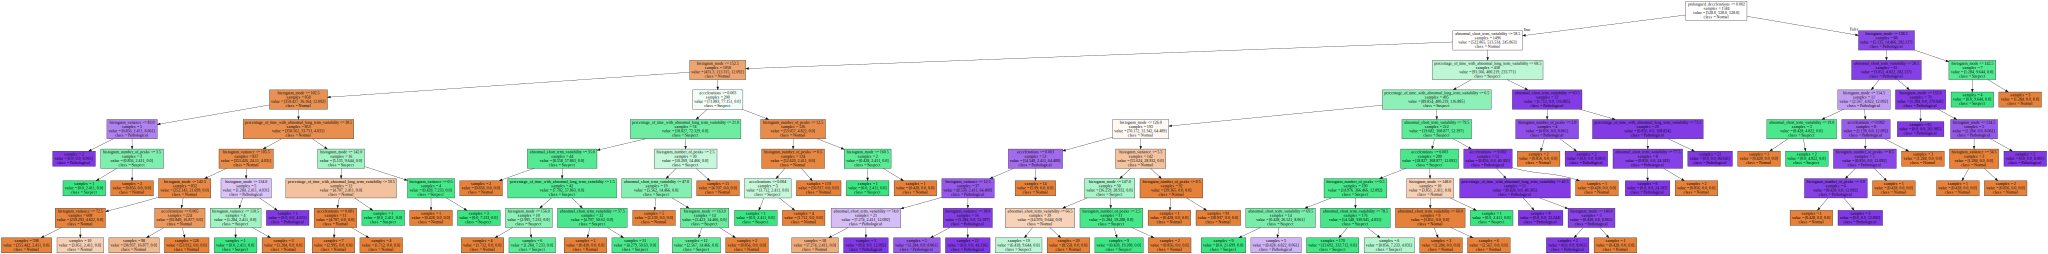

In [25]:
import graphviz
with open("clf.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [26]:
# selected_columns = selected_columns[:-1]
# import statsmodels.api as sm
# def backwardElimination(X, y, sl, columns):
#     numVars = len(X[0])
#     for i in range(0, numVars):
#         regressor_OLS = sm.OLS(y, X).fit()
#         maxVar = max(regressor_OLS.pvalues).astype(float)
#         if maxVar > sl:
#             for j in range(0, numVars - i):
#                 if (regressor_OLS.pvalues[j].astype(float) == maxVar):
#                     X = np.delete(X, j, 1)
#                     columns = np.delete(columns, j)
                    
#     regressor_OLS.summary()
#     return X, columns
# SL = 0.05
# data_modeled, selected_columns = backwardElimination(df1.iloc[:,:-1].values, df1.iloc[:,-1].values, SL, selected_columns)